<a href="https://colab.research.google.com/github/tuananh1006/Torch_Practice/blob/main/NN_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get familar

In [7]:
import numpy as np

In [3]:
X=[0,1]
w1=[2,3]
w2=[0.4,1.8]

In [5]:
dot_X_w1=X[0]*w1[0]+X[1]*w1[1]
dot_X_w1

3

In [8]:
np.dot(X,w1)

3

In [12]:
dot_X_w2=X[0]*w2[0]+X[1]*w2[1]
dot_X_w2

1.8

Neural Network from Scratch

In [16]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 5.91MB/s]


In [18]:
!unzip heart-attack-analysis-prediction-dataset

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [19]:
import pandas as pd
# source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
X=X.to_numpy()
y=y.to_numpy()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
class NeuralNetwork:
  def __init__(self,X_train,y_train,X_test,y_test,lr):
    self.X_train=X_train
    self.y_train=y_train
    self.X_test=X_test
    self.y_test=y_test
    self.w_=np.random.randn(X_train.shape[1])
    self.b_=np.random.randn()
    self.lr=lr
    self.L_train=[]
    self.L_test=[]
  def sigmoid(self,z):
    return 1/(1+np.exp(-z))
  def dsigmoid(self,z):
    return self.sigmoid(z)*(1-self.sigmoid(z))
  def forward(self,X):
    hidden1=np.dot(X,self.w_)+self.b_
    activate1=self.sigmoid(hidden1)
    return activate1
  def backward(self,X,y_true):
    y_pred=self.forward(X)
    #Loss (Y-Y_PRED)^2
    dL_dpred=2*(y_pred-y_true)
    hidden1=np.dot(X,self.w_)+self.b_
    dpred_hidden1=self.dsigmoid(hidden1)
    dhidden1_dw=X
    dhidden1_db=1
    dL_dw=dL_dpred*dpred_hidden1*dhidden1_dw
    dL_db=dL_dpred*dpred_hidden1*dhidden1_db
    return dL_dw,dL_db
  def optimizer(self,dL_dw,dL_db):
    self.w_=self.w_-self.lr*dL_dw
    self.b_=self.b_-self.lr*dL_db
  def train(self,epoch):
    for i in range(epoch):
      random_pos=np.random.randint(len(self.X_train))
      y_train=self.y_train[random_pos]
      y_train_predict=self.forward(self.X_train[random_pos])
      L=np.sum((y_train-y_train_predict)**2)
      self.L_train.append(L)
      dL_dw,dL_db=self.backward(self.X_train[random_pos],y_train)
      self.optimizer(dL_dw,dL_db)

      L_sum=0
      for j in range(len(self.X_test)):
        y_test=self.y_test[j]
        y_test_predict=self.forward(self.X_test[j])
        L=np.sum((y_test-y_test_predict)**2)
        L_sum+=L
      self.L_test.append(L_sum)
    return "Train succesfully"


In [55]:
model=NeuralNetwork(X_train,y_train,X_test,y_test,lr=0.1)

In [56]:
model.train(epoch=100)

'Train succesfully'

<Axes: >

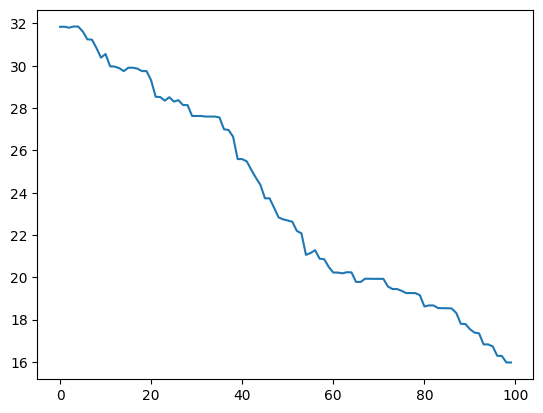

In [57]:
import seaborn as sns
sns.lineplot(x=list(range(len(model.L_test))), y=model.L_test)


<Axes: >

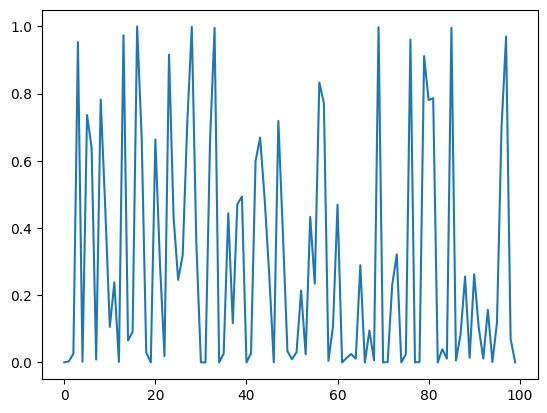

In [58]:
import seaborn as sns
sns.lineplot(x=list(range(len(model.L_train))), y=model.L_train)


In [59]:
total = X_test.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(model.forward(X_test[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0

In [60]:
acc = correct / total
acc

0.6557377049180327

In [44]:
from collections import Counter
Counter(y_test)

Counter({0: 29, 1: 32})

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_preds)


array([[ 9, 20],
       [25,  7]])

In [48]:
Counter(y_test)[0]/(Counter(y_test)[0]+Counter(y_test)[1])

0.47540983606557374